# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1.  Muhammad Usman (Matriculation Number : 407503)
    2.  Yashab Faryal (Matriculation Number : 407548)

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from IPython.display import IFrame    

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
#path of the file
data_url = 'population_density.csv'

# read data from csv file as pandas dataframe
df = pd.read_csv(data_url)

# frac=0.9 which means 90% selection of data using random sampling
# random_state is used as seed (Here I am using my Matriculation No. as required)
df_percent = df.sample(frac=0.9, random_state=407503)
df_percent.to_csv('population_density_90percent_sampled.csv')

population_density_categorical = []

for i in range(0,len(df_percent["population_density"])):
    if (df_percent.iloc[i]["population_density"] >= 5824):
        population_density_categorical.append("very high")
    elif (df_percent.iloc[i]["population_density"] >= 4368 and df_percent.iloc[i]["population_density"]<5824):
        population_density_categorical.append("high")
    elif (df_percent.iloc[i]["population_density"] >= 2912 and df_percent.iloc[i]["population_density"]<4368):
        population_density_categorical.append("medium")
    elif (df_percent.iloc[i]["population_density"] >= 1456 and df_percent.iloc[i]["population_density"]<2912):
        population_density_categorical.append("low")
    elif (df_percent.iloc[i]["population_density"] < 1456):
        population_density_categorical.append("very low")

df_percent["population_density_categorical"] = population_density_categorical

export_csv = df_percent.to_csv (r'population_density_categorical.csv') 

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

Text(0.5, 1.0, 'Temperature without outliers')

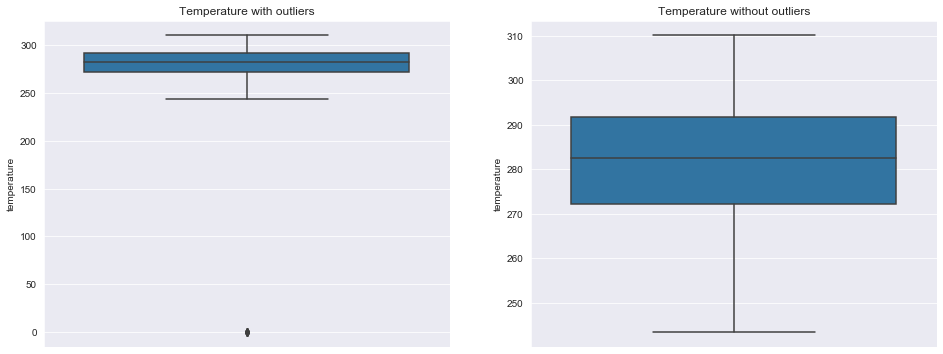

In [156]:
data_url = 'population_density_categorical.csv'

# read data from csv file as pandas dataframe
df_original = pd.read_csv(data_url)

upper_quartile = df_original["temperature"].quantile(0.75)
lower_quartile = df_original["temperature"].quantile(0.25)
IQR = (upper_quartile - lower_quartile)
upperFence = upper_quartile + 1.5 * IQR
lowerFence = lower_quartile - 1.5 * IQR

# removing outliers - Cleaning the data
df_cleaned = df_original[df_original.temperature > lowerFence]
df_cleaned = df_cleaned[df_original.temperature < upperFence]

# After removing the outliers, export the cleaned dataset into CSV file - named 'population_density_categorical_clean.csv'
export_csv = df_cleaned.to_csv (r'population_density_categorical_clean.csv') 

# plotting_before_removing_outliers
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.boxplot(df_original["temperature"], orient='v')
plt.title('Temperature with outliers')

# plotting_after_removing_outliers
plt.subplot(122)
sns.boxplot(df_cleaned["temperature"], orient='v')
plt.title('Temperature without outliers')

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [146]:
import statistics 

# Finding Mean, Median & Mode for Original Datasets
original_median = statistics.median(df_original['temperature'])  # median for the 'temperature' 
original_mean = statistics.mean(df_original["temperature"])      # mean for the 'temperature'
original_mode = statistics.mode(df_original['temperature'])      # mode for the 'temperature'

# Finding Mean, Median & Mode for Cleaned Datasets
cleaned_median = statistics.median(df_cleaned['temperature'])    # median for the 'temperature' 
cleaned_mean = statistics.mean(df_cleaned["temperature"])        # mean for the 'temperature'
cleaned_mode = statistics.mode(df_cleaned['temperature'])        # mode for the 'temperature'

# Printing stats
stats = pd.DataFrame(np.array([['Original Dataset', original_mean, original_median, original_mode], ['Cleaned Dataset', cleaned_mean, cleaned_median, cleaned_mode]]), columns=['', 'Mean', 'Median', 'Mode'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head())

# INTERPRETATION :
# The statistical values of both cleaned & original datasets are SAME 
# because the outliers have zero value. 
# so there is no impact on the statistical analysis (i-e Median, Mean & Mode)
print("\nInterpretation : \nThe statistical values of both cleaned & original datasets are SAME because the outliers have zero value. \nso there is no impact on the statistical analysis (i-e Median, Mean & Mode)")

,,Mean,Median,Mode
,Original Dataset,281.2260937442375,282.51,274.15
,Cleaned Dataset,281.29093122608015,282.525,274.15



Interpretation : 
The statistical values of both cleaned & original datasets are SAME because the outliers have zero value. 
so there is no impact on the statistical analysis (i-e Median, Mean & Mode)


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [64]:
print('There are ', (len(df_original["temperature"])-len(df_cleaned['temperature'])), ' rows removed by removing outliers' )

There are  10  rows removed by removing outliers


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

1356.0 is the maximum mean value of population density for ' New Years Day ' holiday
535.5 is the minimum mean value of population density for ' Columbus Day ' holiday


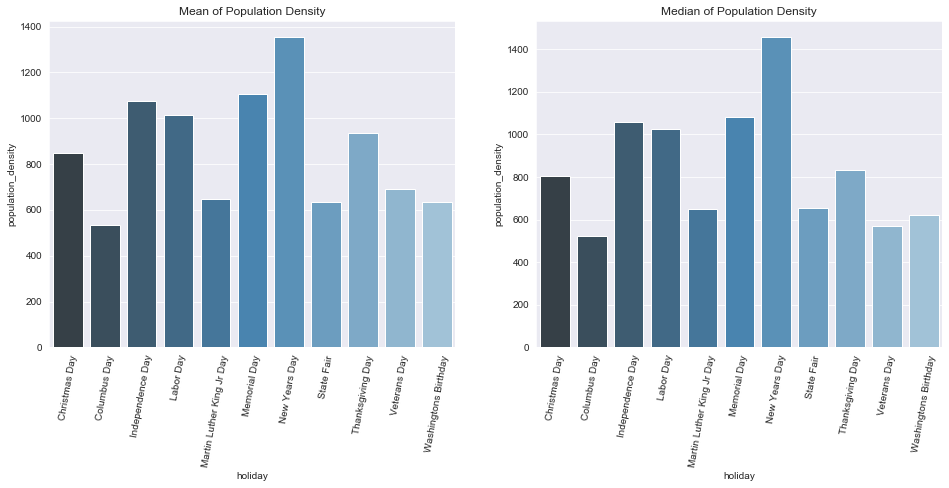

In [69]:
# Divide the dataset into groups on the basis of Holiday

# Calculate mean of 'population_density' on group basis
df_mean = df_original.groupby('holiday')['population_density'].mean().reset_index()

# Calculate median of 'population_density' on group basis
df_median = df_original.groupby('holiday')['population_density'].median().reset_index()

# Filter the holidays value for non-'None'
# Drop the row (instance) that have 'None' holiday value
df_mean = df_mean[df_mean.holiday != 'None']
df_median = df_median[df_median.holiday != 'None']

# Visualize Mean of 'population_density'
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title('Mean of Population Density')
sns.set_style('darkgrid')
bar = sns.barplot(x="holiday", y="population_density", data=df_mean, palette="Blues_d", ci=None)
bar.set_xticklabels(bar.get_xticklabels(),rotation=80)

# Visualize Median of 'population_density'
plt.subplot(122)
plt.title('Median of Population Density')
sns.set_style('darkgrid')
bar = sns.barplot(x="holiday", y="population_density", data=df_median, palette="Blues_d", ci=None)
bar.set_xticklabels(bar.get_xticklabels(),rotation=80)

# Specify the "holiday" values for which the mean of "population_density" is maximal.
print(df_mean["population_density"].max(), "is the maximum mean value of population density for '", df_mean["holiday"][df_mean["population_density"].idxmax()] , "' holiday")

# Specify the "holiday" values for which the mean of "population_density" is minimal.
print(df_mean["population_density"].min(), "is the minimum mean value of population density for '", df_mean["holiday"][df_mean["population_density"].idxmin()] , "' holiday")


   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

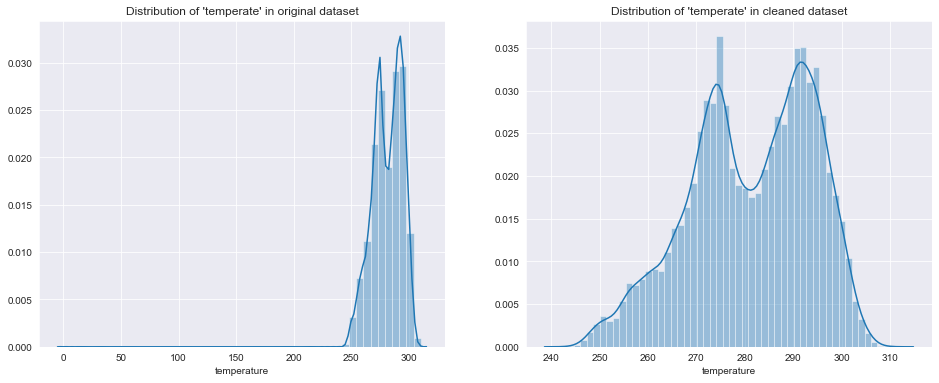

In [154]:
from scipy import stats

# Distribution of 'temperature' for original datasets 
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title('Distribution of \'temperate\' in original dataset')
sns.distplot(df_original['temperature'])

# Distribution of 'temperature' for cleaned datasets
plt.subplot(122)
plt.title('Distribution of \'temperate\' in cleaned dataset')
sns.distplot(df_cleaned['temperature'])

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

The range of temperature for which the frequency of data is greatest is greater between 200 and 300 approximately.
The range of population_density for which the frequency of data is greatest is greater between 100 and 7000 approximately.


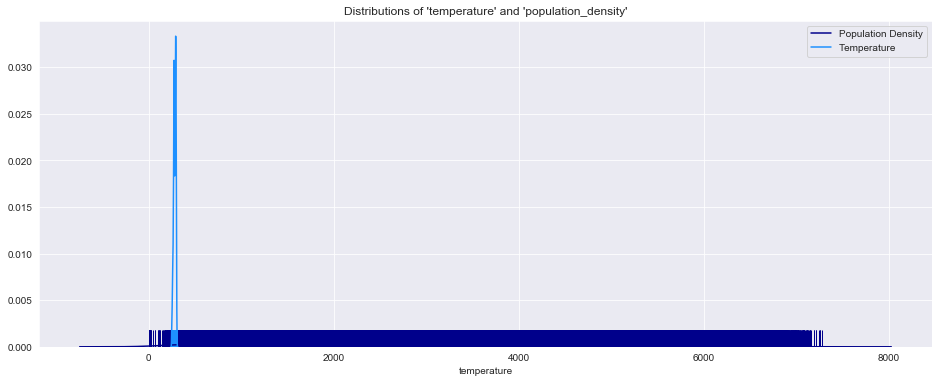

In [233]:
plt.figure(figsize=(16, 6))
plt.title('Distributions of \'temperature\' and \'population_density\'')
# Distribution of 'population_density' for cleaned datasets 
sns.distplot(df_cleaned['population_density'], color="darkblue", label="Population Density", hist=False, rug=True)

# Distribution of 'temperature' for cleaned datasets
sns.distplot(df_cleaned['temperature'], color="dodgerblue", label="Temperature", hist=False, rug=True)
print('The range of temperature for which the frequency of data is greatest is greater between 200 and 300 approximately.')
print('The range of population_density for which the frequency of data is greatest is greater between 100 and 7000 approximately.')

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [71]:
# Calculate upper quartile of 'temperature' for cleaned dataset
upper_quartile = df_cleaned["temperature"].quantile(0.75)

# Calculate upper quartile of 'temperature' for cleaned dataset
lower_quartile = df_cleaned["temperature"].quantile(0.25)

temperature_categorical = []

# Iterate all the values of 'temperature' 
for i in range(0,len(df_cleaned["temperature"])):
    
    # temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
    if (df_cleaned.iloc[i]["temperature"] >= upper_quartile):
        temperature_categorical.append("high")
    
    # temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
    elif (df_cleaned.iloc[i]["temperature"] <= lower_quartile):
        temperature_categorical.append("low")
        
    # lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'
    elif (df_cleaned.iloc[i]["temperature"] > lower_quartile and df_cleaned.iloc[i]["temperature"] < upper_quartile):
        temperature_categorical.append("medium")

# Append the new column 'temperature_categorical' in dataframe 
df_cleaned["temperature_categorical"] = temperature_categorical

df_cleaned.to_csv('temperature_categorical.csv')

   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [74]:
from p_decision_tree.DecisionTree import DecisionTree

descriptive_features = ["holiday", "temperature_categorical", "weather_type"]
target_features = "population_density_categorical"

data_descriptive = df_cleaned[descriptive_features].values

data_label = df_cleaned[target_features].values

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive, descriptive_features, data_label, "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )


print("Entropy: ", format(decisionTree.entropy))

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
Entropy:  2.231038449600441


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: 
weather_type is the best attribute for splitting the tree in the second round of ID3 Algorithm because it is the second highest descriptive feature based on entropy.
Please refer to the 'visualTree.gv' file uploaded as attachment.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [128]:
# Reading extracted data
dataset_regression_raw = pd.read_csv('population_density_categorical.csv')

# Restricting extracted data to the specified columns
dataset_regression = dataset_regression_raw[['holiday','temperature','rain_1h', 'snow_1h', 'clouds_percentage','date_time','population_density']]

# Restricting 'date_time' column to only hour values
dataset_regression['date_time'] = pd.DatetimeIndex(dataset_regression['date_time']).hour

   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation: Linear regression is unable to handle categorical features. All of our features, except 'holiday', are numerical and hence, suitable as input for linear regression. We need to modify the feature 'holiday' - convert it to a numerical feature - for using it as an input for linear regression.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation: We convert 'holiday' - our categorical feature - to numerical using one-hot encoding.

In [129]:
# Converting 'holiday' to numerical feature using one hot encoding
df_one_hot = pd.get_dummies(dataset_regression['holiday'])
dataset_regression = dataset_regression.drop(columns=['holiday'])
dataset_regression = pd.concat([dataset_regression, df_one_hot], axis=1)
dataset_regression.head(2)

,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
0,272.55,0.0,0.0,40,17,6009,0,0,0,0,0,0,0,1,0,0,0,0
1,288.43,0.0,0.0,75,23,1132,0,0,0,0,0,0,0,1,0,0,0,0


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

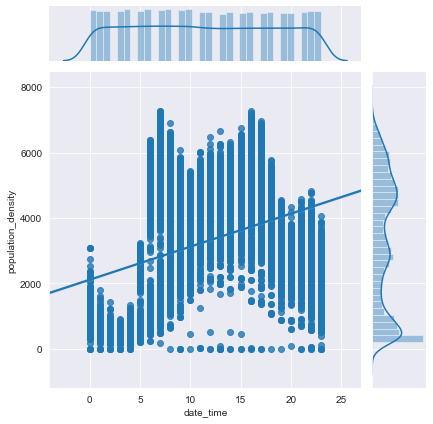

In [170]:
sns.jointplot(x="date_time", y="population_density", data=dataset_regression, kind="reg");

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [131]:
# Creating subset of data by sampling
row_count = dataset_regression.shape[0]

# RegA : Random Sampling
dataset_regressionA = dataset_regression.sample((int)(row_count/2))

# RegB : Top Sampling
dataset_regressionB = dataset_regression[:(int)(row_count/2)]

# Saving datasets to file
dataset_regressionA.to_csv('RegA.csv')
dataset_regressionB.to_csv('RegB.csv')

Explanation:
We chose the following 2 sampling methods:
1. Random Sampling: We chose this method because it will ensure that there is no bias in the sampled data.
2. Top Sampling: We chose this method to compare the outcome with our random sampling and see if the data was biased or not.

We expect 'RegA' to result in a better classifier as it should be bias free.

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [132]:
# Creating and training classifiers
def CreateTrainPredictLinearRegressionModel(df, target_feature):
    classifier = LinearRegression()
    descriptiveFeatures = df.drop(target_feature, axis = 1)
    descriptiveFeaturesList = descriptiveFeatures.values.tolist()
    targetFeatureList = df[target_feature].values.tolist()
    classifier.fit(descriptiveFeaturesList, targetFeatureList)
    prediction = classifier.predict(descriptiveFeaturesList)
    return classifier, descriptiveFeatures, prediction

classifierA, descriptiveFeaturesA, predictionA = CreateTrainPredictLinearRegressionModel(dataset_regressionA, 'population_density')
classifierB, descriptiveFeaturesB, predictionB = CreateTrainPredictLinearRegressionModel(dataset_regressionB, 'population_density')

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

Text(0, 0.5, 'population_density')

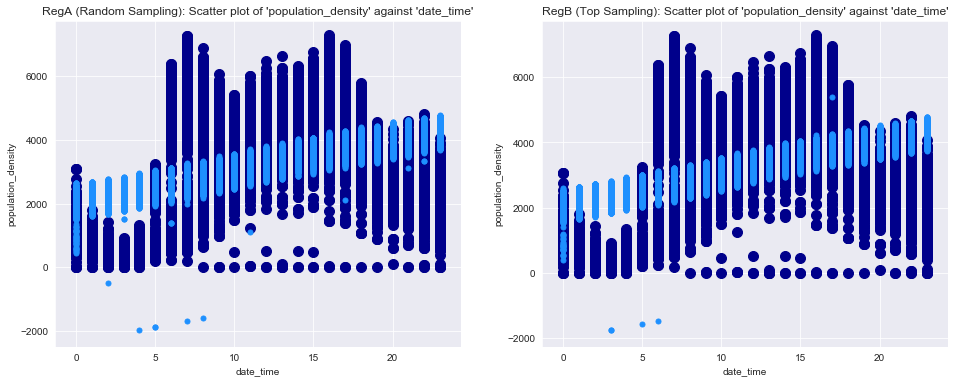

In [186]:
# Visualising the result of regression against original dataset

# Scatter plot of RegA combined with original dataset 
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title('RegA (Random Sampling): Scatter plot of \'population_density\' against \'date_time\'')
plt.scatter(dataset_regression[['date_time']], dataset_regression[['population_density']], color = "darkblue", marker = "o", s = 100) 
plt.scatter(descriptiveFeaturesA[['date_time']], predictionA, color = "dodgerblue", marker = ".", s = 100) 
plt.xlabel('date_time') 
plt.ylabel('population_density') 
#plt.title(title)

# Distribution of 'temperature' for cleaned datasets
plt.subplot(122)
plt.title('RegB (Top Sampling): Scatter plot of \'population_density\' against \'date_time\'')
plt.scatter(dataset_regression[['date_time']], dataset_regression[['population_density']], color = "darkblue", marker = "o", s = 100) 
plt.scatter(descriptiveFeaturesB[['date_time']], predictionB, color = "dodgerblue", marker = ".", s = 100) 
plt.xlabel('date_time') 
plt.ylabel('population_density') 
#plt.title(title)

   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [191]:
# training classifiers on original dataset
classifierA.fit(dataset_regression.drop(columns=['population_density']).values.tolist(), dataset_regression['population_density'].values.tolist())
prediction_original = classifierA.predict(dataset_regression.drop(columns=['population_density']).values.tolist())

,Dataset,Mean Squared Error,Mean Absolute Error,Median Squared Error
,Original Dataset,3413219.2027516263,1634.6300628437411,3413219.2027516263
,RegA,3410645.888254114,1632.20642192173,2677656.9059940204
,RegB,3418722.2237457214,1636.3335711803466,2688934.3742482904


Text(0, 0.5, 'squared errors')

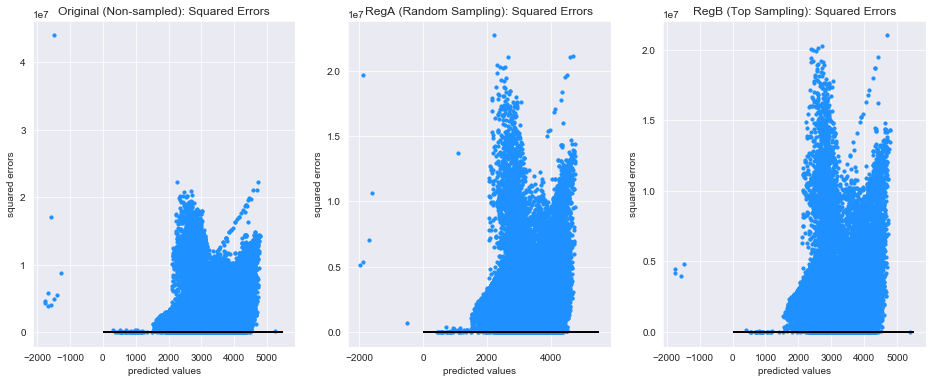

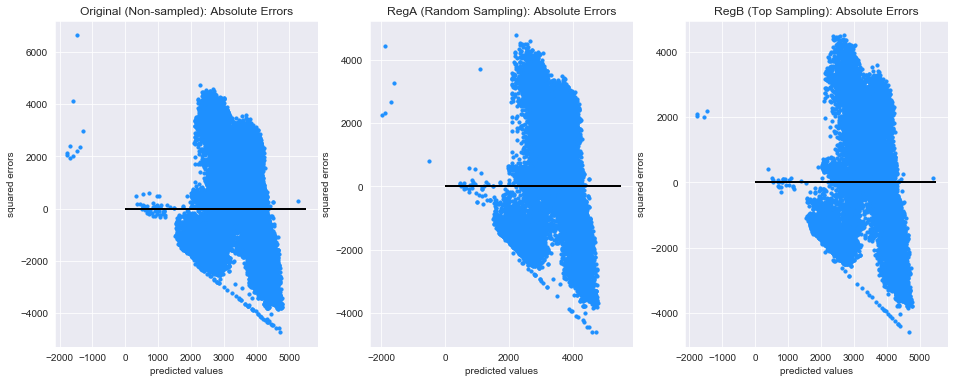

In [201]:
def CalculateMeanSquaredError(df, prediction):
    return mean_squared_error(df['population_density'], prediction)

def CalculateMeanAbsoluteError(df, prediction):
    return mean_absolute_error(df['population_density'], prediction)

def CalculateMedianSquaredError(df, prediction):
    return np.median((df['population_density'] - prediction)**2)

# Computing Mean Squared Errors
original_mse = CalculateMeanSquaredError(dataset_regression, prediction_original)
A_mse = CalculateMeanSquaredError(dataset_regressionA, predictionA)
B_mse = CalculateMeanSquaredError(dataset_regressionB, predictionB)

# Computing Mean Absolute Errors
original_mae = CalculateMeanAbsoluteError(dataset_regression, prediction_original)
A_mae = CalculateMeanAbsoluteError(dataset_regressionA, predictionA)
B_mae = CalculateMeanAbsoluteError(dataset_regressionB, predictionB)

# Computing Median Squared Errors
original_medianse = CalculateMeanSquaredError(dataset_regression, prediction_original)
A_medianse = CalculateMedianSquaredError(dataset_regressionA, predictionA)
B_medianse = CalculateMedianSquaredError(dataset_regressionB, predictionB)

stats = pd.DataFrame(np.array([['Original Dataset', original_mse, original_mae, original_medianse], ['RegA', A_mse, A_mae, A_medianse], ['RegB', B_mse, B_mae, B_medianse]]), columns=['Dataset', 'Mean Squared Error', 'Mean Absolute Error', 'Median Squared Error'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head())

# Plotting squared errors
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.title('Original (Non-sampled): Squared Errors')
plt.scatter(prediction_original, (dataset_regression['population_density'] - prediction_original) ** 2, color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')
plt.subplot(132)
plt.title('RegA (Random Sampling): Squared Errors')
plt.scatter(predictionA, (dataset_regressionA['population_density'] - predictionA) ** 2, color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')
plt.subplot(133)
plt.title('RegB (Top Sampling): Squared Errors')
plt.scatter(predictionB, (dataset_regressionB['population_density'] - predictionB) ** 2, color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')


# Plotting absolute errors
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.title('Original (Non-sampled): Absolute Errors')
plt.scatter(prediction_original, (dataset_regression['population_density'] - prediction_original), color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')
plt.subplot(132)
plt.title('RegA (Random Sampling): Absolute Errors')
plt.scatter(predictionA, (dataset_regressionA['population_density'] - predictionA), color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')
plt.subplot(133)
plt.title('RegB (Top Sampling): Absolute Errors')
plt.scatter(predictionB, (dataset_regressionB['population_density'] - predictionB), color = "dodgerblue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5500, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared errors')

   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:
The two regression models are quite similar in performance, given the close proximity of their error values. 
From the above, we can infer that their similarity must be due to their being no bias in the data, which is why random sampling and top sampling are yielding almost the same results.

We recommend model 'A' as it has slightly better values for the computed errors.

To improve the results, we could:
1. Perform normalization on the data
2. Remove outliers, if any
3. Perform stratified sampling

## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [249]:
# Reading extracted data
dataset_svm_raw = pd.read_csv('population_density_categorical.csv')

# Restricting extracted data to the specified columns
dataset_svm = dataset_svm_raw[['holiday','temperature','rain_1h', 'snow_1h', 'clouds_percentage','date_time','population_density_categorical']]

# Restricting 'date_time' column to only hour values
dataset_svm['date_time'] = pd.DatetimeIndex(dataset_svm['date_time']).hour

   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [250]:
# Converting 'holiday' to numerical feature using one hot encoding
df_one_hot = pd.get_dummies(dataset_svm['holiday'])
dataset_svm = dataset_svm.drop(columns=['holiday'])
dataset_svm = pd.concat([dataset_svm, df_one_hot], axis=1)

Explanation:
SVM requires that the input features be numerical. All of our features, except 'holiday', are numerical and hence, suitable as input for SVM. We need to modify the feature 'holiday' - convert it to a numerical feature - for using it.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [251]:
# Dividing the dataset into training and testing subsets
descriptiveFeatures = dataset_svm.drop('population_density_categorical', axis=1)
svmTrain_descriptive, svmTest_descriptive, svmTrain_target, svmTest_target = train_test_split(descriptiveFeatures, dataset_svm['population_density_categorical'], train_size = 7000, test_size=3000, stratify=targetFeatureList)

# Concatenating descriptive and target features
svmTrainDataset = pd.concat([svmTrain_descriptive, svmTrain_target], axis=1)
svmTestDataset = pd.concat([svmTest_descriptive, svmTest_target], axis=1)

# Exporting datasets to file
svmTrainDataset.to_csv('SVM_train_dataset.csv')
svmTestDataset.to_csv('SVM_test_dataset.csv')

Explanation:
We have used random sampling to divide the data into training and testing sets using 70:30 ratio.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [252]:
# Creating and training SVMS
def CreateSVMAndGivePrediction(_C, _kernel, desc_train, target_train, desc_test):
    SVM = SVC(C=_C, kernel=_kernel)
    SVM.fit(desc_train, target_train)
    return SVM, SVM.predict(desc_test)

SVM1, SVM1_prediction = CreateSVMAndGivePrediction(1, 'linear', svmTrain_descriptive, svmTrain_target, svmTest_descriptive)
SVM2, SVM2_prediction = CreateSVMAndGivePrediction(0.75, 'poly', svmTrain_descriptive, svmTrain_target, svmTest_descriptive)
SVM3, SVM3_prediction = CreateSVMAndGivePrediction(0.5, 'sigmoid', svmTrain_descriptive, svmTrain_target, svmTest_descriptive)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [253]:
# Printing accuracy and classification report
from sklearn.metrics import classification_report

def PrintAccuracyAndClassificationReport(title, desc_test, target_test, SVM_prediction, SVM):
    print(title)
    print('Accuracy:', SVM.score(desc_test, target_test), '\n')
    print('Classification Report:\n', classification_report(target_test, SVM_prediction), '\n')  

PrintAccuracyAndClassificationReport('SVM1 C = 1, kernel = linear', svmTest_descriptive, svmTest_target, SVM1_prediction, SVM1)
PrintAccuracyAndClassificationReport('SVM2 C = 0.75, kernel = poly', svmTest_descriptive, svmTest_target, SVM2_prediction, SVM2)
PrintAccuracyAndClassificationReport('SVM3 C = 0.5, kernel = sigmoid', svmTest_descriptive, svmTest_target, SVM3_prediction, SVM3)

SVM1 C = 1, kernel = linear
Accuracy: 0.5623333333333334 

Classification Report:
               precision    recall  f1-score   support

        high       0.60      0.76      0.67       846
         low       0.40      0.24      0.30       471
      medium       0.35      0.39      0.37       565
   very high       0.00      0.00      0.00       299
    very low       0.70      0.86      0.77       819

    accuracy                           0.56      3000
   macro avg       0.41      0.45      0.42      3000
weighted avg       0.49      0.56      0.52      3000
 

SVM2 C = 0.75, kernel = poly
Accuracy: 0.6126666666666667 

Classification Report:
               precision    recall  f1-score   support

        high       0.54      0.84      0.66       846
         low       0.50      0.49      0.49       471
      medium       0.53      0.35      0.43       565
   very high       0.50      0.01      0.03       299
    very low       0.82      0.84      0.83       819

    accuracy    

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:

SVM 1 (C = 1, kernel = linear)
Its accuracy is 50%, but for the label 'very high', precion, recall, and f1-score are all zero. 

SVM 2 (C = 0.75, kernel = poly)
Its accuracy is 60%, better than SVM1, and it is also able to provide metrics for all labels in target feature.

SVM 3 (C = 0.5, kernel = sigmoid)
Its accuracy is worst of the 3 models at around 27%, and we are unable to provide metric scores for labels 'low, medium, very high, and very low. 

The three SVM are different due to the use of different kernels and C values - we chose 1, 0.75, and 0.5 to identify how the model behaves when we leave no room for misclassification error, when we give some leeway, and when we increase it to allow for 50% misclassification. 

We recommend SVM 2 that uses the 'poly' kernel with C = 0.75, as it provides best accuracy among the models, and we are able to generate metrics for all labels in target class.

## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [86]:
#path of the file
data_url = 'population_density_categorical.csv'

# read data from csv file as pandas dataframe
df = pd.read_csv(data_url)

# To avoid performance problems, select first 4000 rows 
df = df[:4000]

# Extract the time from date_time feature
df['date_time'] = [d.split()[1] for d in df['date_time']]

cols = df.columns[1:-1]

num_cols = df._get_numeric_data().columns

features = list(cols)
print("The possible extracted features are : \n", features)

categorical_data = list(set(cols) - set(num_cols))
print("\nThe Number of possible patterns for each input of categorical data are : ")

#total_input_neuron = len(cols) - len(categorical_data)
for i in categorical_data:
    #total_input_neuron = total_input_neuron + len(df[i].unique())
    print(i , " = " , len(df[i].unique()))
    
#print("\nTotal Number of Input Neurons are ", total_input_neuron)

The possible extracted features are : 
 ['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'weather_type', 'weather_type_details', 'date_time', 'population_density']

The Number of possible patterns for each input of categorical data are : 
holiday  =  9
weather_type  =  9
date_time  =  24
weather_type_details  =  30


Explanation:
The possible extracted features are the all descriptive features in the dataset.

The Number of possible patterns for each input of categorical data are the number of unique values (or different type of values) that each specific feature holds.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:
Yes, in my opinion, it provides accurate result, because the descriptive and target features in the dataset are discrete values (numerical or categorical), and we are not dealing with any data that is in continuous frame .

If the accuracy is not good, we can perform the backpropagation and adjust the weights until maximum accuracy is achieved.

In [87]:
# To show the nature(type) of data, just show some rows of the data
# Each column have either numerical or categorical value 
print(df[1:5])

   Unnamed: 0 holiday  temperature  rain_1h  snow_1h  clouds_percentage  \
1       13808    None       288.43      0.0      0.0                 75   
2       38768    None       274.22      0.0      0.0                  1   
3       20846    None       269.95      0.0      0.0                 90   
4       22942    None       284.28      0.0      0.0                 90   

  weather_type weather_type_details date_time  population_density  \
1       Clouds        broken clouds     23:00                1132   
2        Clear         sky is clear     12:00                4585   
3         Snow           light snow      1:00                 314   
4      Drizzle              drizzle     20:00                3347   

  population_density_categorical  
1                       very low  
2                           high  
3                       very low  
4                         medium  


   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:

In Neural Network, each input neuron is associated with its weight and the input is multiplied with its weight to generate the output on the basis of activation function.
The categorical values are the string values, and we can't multiply them with weight to predict the output. We need to change these string values to numerical values. For this we use different encoding mechansim. Here I am using one hot encoding.

In [88]:
#Which features can be used for designing your network as inputs? 
print("Following features are used as input while designing network :")
print(features)

# Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
print("\nFollowing categorical features in the dataset must be changed from categorical value to numerical value :")
print(categorical_data)

# Before convert categorical to numerical 
# Separate out the Input features & Output features
# So Encoding is only apply on Input Features 
Output = df["population_density_categorical"]
# Now dataframe 'df' only have descriptive features
df = df.drop("population_density_categorical", axis=1)

# Convert Categorical to Numerical 
# Apply One Hot Encoding 
df_one_hot = pd.get_dummies(df)
# Here dataframe 'df_one_hot' have all the descriptive features after one-hot-encoding


Following features are used as input while designing network :
['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'weather_type', 'weather_type_details', 'date_time', 'population_density']

Following categorical features in the dataset must be changed from categorical value to numerical value :
['holiday', 'weather_type', 'date_time', 'weather_type_details']


   (d) Train your network with default hyperparameters and return the parameters.

In [89]:
from sklearn.neural_network import MLPClassifier

# the descriptive feature 
X = df_one_hot[list(df_one_hot.columns[1:])]

# the target feature
Y = Output

# The total dataset have 4000 rows
# Now split the whole dataset into halves
# First 2000 rows are selected for training the Neural Network
# Last 2000 rows are selected for training the Neural Network
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)

nn = MLPClassifier()
# Train the dataset 
parameters = nn.fit(X_train,y_train)
print("The parameters after training the network :")
print(parameters)

The parameters after training the network :
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [203]:
import sklearn.metrics as metric

print("The default number of Hidden Layers are ", len(parameters.hidden_layer_sizes), "with nodes " ,parameters.hidden_layer_sizes[0])

nn = MLPClassifier()
nn.fit(X_train,y_train)
y_pred_default = nn.predict(X_test)                      # prediction 
accuracy_default = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_default).flatten(), normalize=True)
print('Default Accuracy =',accuracy_default) 

# pre_accuracy is the previous accuracy 
# Declare here to used for comparsion in each model
pre_accuracy = accuracy_default

# Declare to store the optimized hidden layer
optimized_hidden_layer = parameters.hidden_layer_sizes

########### 1) Let takes 2 Hidden Layer, Each have 100 neurons #################
size = (100,100)
print("\nWith 2 Hidden Layers and each have 100 node")
nn_above = MLPClassifier(hidden_layer_sizes=size)
nn_above.fit(X_train,y_train)
y_pred_above = nn_above.predict(X_test)                  # prediction 
accuracy_above = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_above).flatten(), normalize=True)
print('Accuracy =',accuracy_above)

# Compare the accuracy with previous model
# If accuracy is greater, then this model have the optimized number of layers
if (accuracy_above > pre_accuracy):
    optimized_hidden_layer = size
    pre_accuracy = accuracy_above

########### 2) Let takes 3 Hidden Layer, Each have 100 neurons #################
size = (100,100,100)
print("\nWith 3 Hidden Layers and each have 100 node")
nn_above = MLPClassifier(hidden_layer_sizes=size)
nn_above.fit(X_train,y_train)
y_pred_above = nn_above.predict(X_test)                      # prediction 
accuracy_above = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_above).flatten(), normalize=True)
print('Accuracy =',accuracy_above)

# Again Compare the accuracy with previous model
# If accuracy is greater, then this model have the optimized number of layers
if (accuracy_above > pre_accuracy):
    optimized_hidden_layer = size
    pre_accuracy = accuracy_above

########### 3) Let takes 3 Hidden Layer, Each have 100,101,102 neurons  #################
size = (100,101,102)
print("\nWith 3 Hidden Layers with each have 100,101,102 node")
nn_above = MLPClassifier(hidden_layer_sizes=size)
nn_above.fit(X_train,y_train)
y_pred_above = nn_above.predict(X_test)                      # prediction 
accuracy_above = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_above).flatten(), normalize=True)
print('Accuracy =',accuracy_above)

# Again Compare the accuracy with previous model
# If accuracy is greater, then this model have the optimized number of layers
if (accuracy_above > pre_accuracy):
    optimized_hidden_layer = size
    pre_accuracy = accuracy_above
    
########### 4) Let takes 3 Hidden Layer, Each have 101,102,103 neurons  #################
size = (101,102,103)
print("\nWith 3 Hidden Layers with each have 101,102,103 node")
nn_above = MLPClassifier(hidden_layer_sizes=size)
nn_above.fit(X_train,y_train)
y_pred_above = nn_above.predict(X_test)                      # prediction 
accuracy_above = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_above).flatten(), normalize=True)
print('Accuracy =',accuracy_above)

# Again Compare the accuracy with previous model
# If accuracy is greater, then this model have the optimized number of layers
if (accuracy_above > pre_accuracy):
    optimized_hidden_layer = size
    pre_accuracy = accuracy_above
    
print("\nOptimized Number of Hidden Layer : ", len(optimized_hidden_layer))


The default number of Hidden Layers are  1 with nodes  100
Default Accuracy = 0.6695

With 2 Hidden Layers and each have 100 node
Accuracy = 0.88

With 3 Hidden Layers and each have 100 node
Accuracy = 0.874

With 3 Hidden Layers with each have 100,101,102 node
Accuracy = 0.921

With 3 Hidden Layers with each have 101,102,103 node
Accuracy = 0.8105

Optimized Number of Hidden Layer :  3


In [234]:
# Your code: (number of nodes in the hidden layer)

print("Optimized Number of Nodes in the Hidden Layer : ",optimized_hidden_layer)

Optimized Number of Nodes in the Hidden Layer :  (100, 101, 102)


In [235]:
# Your code: (optimized network) 

nn = MLPClassifier(hidden_layer_sizes = optimized_hidden_layer)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)                      # prediction 
accuracy = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('Accuracy =',accuracy_above)

Accuracy = 0.8105


Explanation:
With reference to the above accuracy results, the optimized network has 3 hidden layers, and hidden nodes in each layer are 101, 102, and 103, because it gives higher accuracy score as compared to default (at least).

   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [93]:
# Your code: (linear activation function):

import sklearn.metrics as metric
import numpy as np

# identity is the linear activation function
linear_act_func = MLPClassifier(activation = 'identity')
linear_act_func.fit(X_train,y_train)


y_pred_linear = linear_act_func.predict(X_test)                      # prediction
accuracy_linear = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_linear).flatten(), normalize=True)
print('Accuracy with linear activation function i-e identity =',accuracy_linear)   

Accuracy with linear activation function i-e identity = 0.5035


In [94]:
# Your code: (non-linear activation function):

# logistic is the sigmoid non-linear activation function 
non_linear_act_func = MLPClassifier(activation = 'logistic')
non_linear_act_func.fit(X_train,y_train)


y_pred_non_linear = non_linear_act_func.predict(X_test)                      # prediction
accuracy_non_linear = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_non_linear).flatten(), normalize=True)
print('Accuracy with non-linear activation function i-e logistic =',accuracy_non_linear)

Accuracy with non-linear activation function i-e logistic = 0.918


Explanation:
The accuracy with non-linear activation function is greater, which implies that the target feature is not linearly dependent on descriptive features. That's why the model predicts the target values with higher accuracy on the basis of unseen dataset.

## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [257]:
def Create3FoldData(svm_d, svm_t): 
    kf = KFold(n_splits=3)
    kf.get_n_splits(svm_d)

    k = 0
    svm_train_descriptive = []
    svm_train_target = []
    svm_test_descriptive = []
    svm_test_target = []

    for train_index, test_index in kf.split(svm_d):
        train_d = []
        train_t = []
        for index in train_index:
            train_d.append(svm_d.iloc[index])
            train_t.append(svm_t.iloc[index])
        svm_train_descriptive.append(train_d)
        svm_train_target.append(train_t)

        test_d = []
        test_t = []
        for index in test_index:
            test_d.append(svm_d.iloc[index])
            test_t.append(svm_t.iloc[index])
        svm_test_descriptive.append(test_d)
        svm_test_target.append(test_t)
        k += 1
    return svm_train_descriptive, svm_test_descriptive, svm_train_target, svm_test_target

def Create3FoldDataForANN(nn_d, nn_t): 
    kf = KFold(n_splits=3)
    kf.get_n_splits(nn_d)

    k = 0
    nn_train_descriptive = []
    nn_train_target = []
    nn_test_descriptive = []
    nn_test_target = []

    for train_index, test_index in kf.split(nn_d):
        train_d = []
        train_t = []
        for index in train_index:
            train_d.append(nn_d.iloc[index])
            train_t.append(nn_t.iloc[index])
        nn_train_descriptive.append(train_d)
        nn_train_target.append(train_t)

        test_d = []
        test_t = []
        for index in test_index:
            test_d.append(nn_d.iloc[index])
            test_t.append(nn_t.iloc[index])
        nn_test_descriptive.append(test_d)
        nn_test_target.append(test_t)
        k += 1
    return nn_train_descriptive, nn_test_descriptive, nn_train_target, nn_test_target

### SVM: Confusion Matrices on Training Set

In [258]:
# Splitting the data into training and testing sets for k-fold validation
svmTrain_descriptive_train, svmTrain_descriptive_test, svmTrain_target_train, svmTrain_target_test = Create3FoldData(svmTrain_descriptive, svmTrain_target)
svmTest_descriptive_train, svmTest_descriptive_test, svmTest_target_train, svmTest_target_test = Create3FoldData(svmTest_descriptive, svmTest_target)

In [259]:
# Fitting the model using training data

svmTrain_prediction = []
for i in range(len(svmTrain_descriptive_train)):
    SVM2.fit(svmTrain_descriptive_train[i], svmTrain_target_train[i])
    _svm_train_prediction = SVM2.predict(svmTrain_descriptive_test[i])
    svmTrain_prediction.append(_svm_train_prediction)

In [260]:
# Creating confusion matrix for each fold and summing cell-by-cell

cm = np.zeros((5, 5))
for i in range(len(svmTrain_prediction)):
    print('SVM Confusion Matrix on Training Data [k=', i + 1, ']')
    _cm = confusion_matrix(svmTrain_target_test[i], svmTrain_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('SVM Confusion Matrix on Training Data for All Folds (summed cell-by-cell)')
print(cm)

SVM Confusion Matrix on Training Data [k= 1 ]
[[542  25  85   0  17]
 [ 67 180  43   0  71]
 [205  78 140   0  27]
 [187   7  40   1  12]
 [ 20  65   1   0 521]]
SVM Confusion Matrix on Training Data [k= 2 ]
[[538  31  55  10   2]
 [ 68 189  65   1  58]
 [190  56 155   1  17]
 [184   8  19   8   0]
 [ 19  84   0   5 570]]
SVM Confusion Matrix on Training Data [k= 3 ]
[[550  22  71   0  25]
 [ 57 180  42   0  78]
 [202  49 172   0  27]
 [197   6  22   0   7]
 [ 22  84   3   0 517]]
SVM Confusion Matrix on Training Data for All Folds (summed cell-by-cell)
[[1.630e+03 7.800e+01 2.110e+02 1.000e+01 4.400e+01]
 [1.920e+02 5.490e+02 1.500e+02 1.000e+00 2.070e+02]
 [5.970e+02 1.830e+02 4.670e+02 1.000e+00 7.100e+01]
 [5.680e+02 2.100e+01 8.100e+01 9.000e+00 1.900e+01]
 [6.100e+01 2.330e+02 4.000e+00 5.000e+00 1.608e+03]]


### ANN: Confusion Matrices on Training Set

In [242]:
nn_train_descriptive_train, nn_test_descriptive_train, nn_train_target_train, nn_test_target_train = Create3FoldDataForANN(X_train, y_train)
nn_train_descriptive_test, nn_test_descriptive_test, nn_train_target_test, nn_test_target_test = Create3FoldDataForANN(X_test, y_test)

# NonLinear Activation Function
# fitting the model using training data
nn_train_non_linear_prediction = []
for i in range(len(nn_train_descriptive_train)):
    non_linear_act_func.fit(nn_train_descriptive_train[i], nn_train_target_train[i])
    _y_pred_non_linear_train = non_linear_act_func.predict(nn_test_descriptive_train[i])
    nn_train_non_linear_prediction.append(_y_pred_non_linear_train)
    
# Optimized Network
# fitting the model using training data
nn_train_optimized_prediction = []
for i in range(len(nn_train_descriptive_train)):
    nn.fit(nn_train_descriptive_train[i], nn_train_target_train[i])
    _y_pred_optimized_train = nn.predict(nn_test_descriptive_train[i])
    nn_train_optimized_prediction.append(_y_pred_optimized_train)


In [243]:
# Creating confusion matrix for each fold and summing cell-by-cell

cm = np.zeros((5, 5))
print('------------------------------------------------------------------------------------------')
for i in range(len(nn_train_non_linear_prediction)):
    print('ANN (non-linear) Confusion Matrix on Training Data [k=', i + 1, ']')
    _cm = confusion_matrix(nn_test_target_train[i], nn_train_non_linear_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('ANN (non-linear) Confusion Matrix on Training Data for All Folds (summed cell-by-cell)')
print(cm)


cm = np.zeros((5, 5))
print('------------------------------------------------------------------------------------------')
for i in range(len(nn_train_optimized_prediction)):
    print('ANN (optimized) Confusion Matrix on Training Data [k=', i + 1, ']')
    _cm = confusion_matrix(nn_test_target_train[i], nn_train_optimized_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('ANN (optimized) Confusion Matrix on Training Data for All Folds (summed cell-by-cell)')
print(cm)

------------------------------------------------------------------------------------------
ANN (non-linear) Confusion Matrix on Training Data [k= 1 ]
[[185   0   2   4   0]
 [  0 108   9   0   2]
 [ 11   6  99   0   0]
 [ 14   0   0  58   0]
 [  0   2   0   0 167]]
ANN (non-linear) Confusion Matrix on Training Data [k= 2 ]
[[174   0   2  29   0]
 [  0 100   6   0   3]
 [ 21   6  89   0   0]
 [  0   0   0  64   0]
 [  0   2   0   0 171]]
ANN (non-linear) Confusion Matrix on Training Data [k= 3 ]
[[167   0   7  25   0]
 [  0  85  11   0   3]
 [ 11   0 103   0   0]
 [  1   0   0  66   0]
 [  0   0   0   0 187]]
ANN (non-linear) Confusion Matrix on Training Data for All Folds (summed cell-by-cell)
[[526.   0.  11.  58.   0.]
 [  0. 293.  26.   0.   8.]
 [ 43.  12. 291.   0.   0.]
 [ 15.   0.   0. 188.   0.]
 [  0.   4.   0.   0. 525.]]
------------------------------------------------------------------------------------------
ANN (optimized) Confusion Matrix on Training Data [k= 1 ]
[[ 31  

- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

### SVM: Confusion Matrices on Test Set

In [261]:
# Fitting the model using testing data

svmTest_prediction = []
for i in range(len(svmTest_descriptive_train)):
    SVM2.fit(svmTest_descriptive_train[i], svmTest_target_train[i])
    _svm_test_prediction = SVM2.predict(svmTest_descriptive_test[i])
    svmTest_prediction.append(_svm_test_prediction)

In [262]:
cm = np.zeros((5, 5))
for i in range(len(svmTest_prediction)):
    print('SVM Confusion Matrix on Testing Data [k=', i + 1, ']')
    _cm = confusion_matrix(svmTest_target_test[i], svmTest_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('SVM Confusion Matrix on Testing Data for All Folds (summed cell-by-cell)')
print(cm)

SVM Confusion Matrix on Testing Data [k= 1 ]
[[244   7  20   3  14]
 [ 27  69  21   0  31]
 [ 89  21  60   0   6]
 [ 95   0   8   0   3]
 [ 16  22   1   0 243]]
SVM Confusion Matrix on Testing Data [k= 2 ]
[[252   6  27   0   1]
 [ 30  92  20   0  28]
 [ 93  23  62   0  10]
 [ 86   2  14   0   0]
 [ 14  28   0   0 212]]
SVM Confusion Matrix on Testing Data [k= 3 ]
[[236   9  24   0   3]
 [ 20  79  21   4  29]
 [ 84  30  78   0   9]
 [ 73   4  11   3   0]
 [  6  27   1   3 246]]
SVM Confusion Matrix on Testing Data for All Folds (summed cell-by-cell)
[[732.  22.  71.   3.  18.]
 [ 77. 240.  62.   4.  88.]
 [266.  74. 200.   0.  25.]
 [254.   6.  33.   3.   3.]
 [ 36.  77.   2.   3. 701.]]


### ANN: Confusion Matrices on Test Set

In [244]:
# NonLinear Activation Function
# fitting the model using testing data
nn_test_non_linear_prediction = []
for i in range(len(nn_train_descriptive_test)):
    non_linear_act_func.fit(nn_train_descriptive_test[i], nn_train_target_test[i])
    _y_pred_non_linear_test = non_linear_act_func.predict(nn_test_descriptive_test[i])
    nn_test_non_linear_prediction.append(_y_pred_non_linear_test)
    
# Optimized Network
# fitting the model using testing data
nn_test_optimized_prediction = []
for i in range(len(nn_train_descriptive_test)):
    nn.fit(nn_train_descriptive_test[i], nn_train_target_test[i])
    _y_pred_optimized_test = nn.predict(nn_test_descriptive_test[i])
    nn_test_optimized_prediction.append(_y_pred_optimized_test)


In [245]:
# Creating confusion matrix for each fold and summing cell-by-cell

cm = np.zeros((5, 5))
print('------------------------------------------------------------------------------------------')
for i in range(len(nn_test_non_linear_prediction)):
    print('ANN (non-linear) Confusion Matrix on Testing Data [k=', i + 1, ']')
    _cm = confusion_matrix(nn_test_target_test[i], nn_test_non_linear_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('ANN (non-linear) Confusion Matrix on Testing Data for All Folds (summed cell-by-cell)')
print(cm)


cm = np.zeros((5, 5))
print('------------------------------------------------------------------------------------------')
for i in range(len(nn_test_optimized_prediction)):
    print('ANN (optimized) Confusion Matrix on Testing Data [k=', i + 1, ']')
    _cm = confusion_matrix(nn_test_target_test[i], nn_test_optimized_prediction[i])
    print(_cm)
    cm = np.add(cm, _cm)
print('ANN (optimized) Confusion Matrix on Testing Data for All Folds (summed cell-by-cell)')
print(cm)

------------------------------------------------------------------------------------------
ANN (non-linear) Confusion Matrix on Testing Data [k= 1 ]
[[153   0   1   5   0]
 [  0  90  17   0   0]
 [ 24   2 102   0   0]
 [  5   0   0  63   0]
 [  0   2   0   0 203]]
ANN (non-linear) Confusion Matrix on Testing Data [k= 2 ]
[[169   0   7   2   0]
 [  0  74   6   0   2]
 [  7   7 129   0   0]
 [ 25   0   0  46   0]
 [  0   0   0   0 193]]
ANN (non-linear) Confusion Matrix on Testing Data [k= 3 ]
[[194   0   6   6   0]
 [  0  87   7   0   1]
 [ 11   2 104   0   0]
 [ 12   0   0  59   0]
 [  0   4   0   0 173]]
ANN (non-linear) Confusion Matrix on Testing Data for All Folds (summed cell-by-cell)
[[516.   0.  14.  13.   0.]
 [  0. 251.  30.   0.   3.]
 [ 42.  11. 335.   0.   0.]
 [ 42.   0.   0. 168.   0.]
 [  0.   6.   0.   0. 569.]]
------------------------------------------------------------------------------------------
ANN (optimized) Confusion Matrix on Testing Data [k= 1 ]
[[151   0   

- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

### SVM: Precision, Recall, and F1-Scores

In [263]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def PrintMetrics(_y_test, _y_pred):
    for i in range(len(_y_test)):
        print('---------------------------------------------------------------------------------------------')
        print('For k = ', i+1)
        print('Precision : ', precision_score(_y_test[i], _y_pred[i], average=None))
        print('Recall : ', recall_score(_y_test[i], _y_pred[i], average=None))
        print('F1-Score : ', f1_score(_y_test[i], _y_pred[i], average=None))
        print('---------------------------------------------------------------------------------------------')

In [276]:
print('############# For Support Vector Machine ##############')
def CreatePrecisionRow(k, _y_test, _y_pred):
    row = []
    row.append(k)
    row.append('Precision')
    _score = precision_score(_y_test, _y_pred, average=None)
    for _sc in _score:
        row.append(_sc)
    return row

def CreateRecallRow(k, _y_test, _y_pred):
    row = []
    row.append(k)
    row.append('Recall')
    _score = recall_score(_y_test, _y_pred, average=None)
    for _sc in _score:
        row.append(_sc)
    return row

def CreateF1ScoreRow(k, _y_test, _y_pred):
    row = []
    row.append(k)
    row.append('f1-score')
    _score = f1_score(_y_test, _y_pred, average=None)
    for _sc in _score:
        row.append(_sc)
    return row
data = []
data.append(CreatePrecisionRow('1',svmTest_target_test[0], svmTest_prediction[0]))
data.append(CreateRecallRow('',svmTest_target_test[0], svmTest_prediction[0]))
data.append(CreateF1ScoreRow('',svmTest_target_test[0], svmTest_prediction[0]))
data.append(CreatePrecisionRow('2',svmTest_target_test[1], svmTest_prediction[1]))
data.append(CreateRecallRow('',svmTest_target_test[1], svmTest_prediction[1]))
data.append(CreateF1ScoreRow('',svmTest_target_test[1], svmTest_prediction[1]))
data.append(CreatePrecisionRow('3',svmTest_target_test[2], svmTest_prediction[2]))
data.append(CreateRecallRow('',svmTest_target_test[2], svmTest_prediction[2]))
data.append(CreateF1ScoreRow('',svmTest_target_test[2], svmTest_prediction[2]))
stats = pd.DataFrame(data, columns=['k', 'Metric', 'high','low','medium','very high','very low'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head(len(stats)))

############# For Support Vector Machine ##############


,k,Metric,high,low,medium,very high,very low
,1,Precision,0.518047,0.579832,0.545455,0.000000,0.818182
,,Recall,0.847222,0.466216,0.340909,0.000000,0.861702
,,f1-score,0.642951,0.516854,0.419580,0.000000,0.839378
,2,Precision,0.530526,0.609272,0.504065,0.000000,0.844622
,,Recall,0.881119,0.541176,0.329787,0.000000,0.834646
,,f1-score,0.662286,0.573209,0.398714,0.000000,0.839604
,3,Precision,0.563246,0.530201,0.577778,0.300000,0.857143
,,Recall,0.867647,0.516340,0.388060,0.032967,0.869258
,,f1-score,0.683068,0.523179,0.464286,0.059406,0.863158


### ANN: Precision, Recall, and F1-Scores

In [278]:
print("\n############# For Neural Network (Non-Linear)##############")
data = []
data.append(CreatePrecisionRow('1',nn_test_target_test[0], nn_test_non_linear_prediction[0]))
data.append(CreateRecallRow('',nn_test_target_test[0], nn_test_non_linear_prediction[0]))
data.append(CreateF1ScoreRow('',nn_test_target_test[0], nn_test_non_linear_prediction[0]))
data.append(CreatePrecisionRow('2',nn_test_target_test[1], nn_test_non_linear_prediction[1]))
data.append(CreateRecallRow('',nn_test_target_test[1], nn_test_non_linear_prediction[1]))
data.append(CreateF1ScoreRow('',nn_test_target_test[1], nn_test_non_linear_prediction[1]))
data.append(CreatePrecisionRow('3',nn_test_target_test[2], nn_test_non_linear_prediction[2]))
data.append(CreateRecallRow('',nn_test_target_test[2], nn_test_non_linear_prediction[2]))
data.append(CreateF1ScoreRow('',nn_test_target_test[2], nn_test_non_linear_prediction[2]))
stats = pd.DataFrame(data, columns=['k', 'Metric', 'high','low','medium','very high','very low'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head(len(stats)))

print("\n############# For Neural Network (Optimized)##############")
data = []
data.append(CreatePrecisionRow('1',nn_test_target_test[0], nn_test_optimized_prediction[0]))
data.append(CreateRecallRow('',nn_test_target_test[0], nn_test_optimized_prediction[0]))
data.append(CreateF1ScoreRow('',nn_test_target_test[0], nn_test_optimized_prediction[0]))
data.append(CreatePrecisionRow('2',nn_test_target_test[1], nn_test_optimized_prediction[1]))
data.append(CreateRecallRow('',nn_test_target_test[1], nn_test_optimized_prediction[1]))
data.append(CreateF1ScoreRow('',nn_test_target_test[1], nn_test_optimized_prediction[1]))
data.append(CreatePrecisionRow('3',nn_test_target_test[2], nn_test_optimized_prediction[2]))
data.append(CreateRecallRow('',nn_test_target_test[2], nn_test_optimized_prediction[2]))
data.append(CreateF1ScoreRow('',nn_test_target_test[2], nn_test_optimized_prediction[2]))
stats = pd.DataFrame(data, columns=['k', 'Metric', 'high','low','medium','very high','very low'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head(len(stats)))


############# For Neural Network (Non-Linear)##############


,k,Metric,high,low,medium,very high,very low
,1,Precision,0.840659,0.957447,0.850000,0.926471,1.000000
,,Recall,0.962264,0.841121,0.796875,0.926471,0.990244
,,f1-score,0.897361,0.895522,0.822581,0.926471,0.995098
,2,Precision,0.840796,0.913580,0.908451,0.958333,0.989744
,,Recall,0.949438,0.902439,0.902098,0.647887,1.000000
,,f1-score,0.891821,0.907975,0.905263,0.773109,0.994845
,3,Precision,0.894009,0.935484,0.888889,0.907692,0.994253
,,Recall,0.941748,0.915789,0.888889,0.830986,0.977401
,,f1-score,0.917258,0.925532,0.888889,0.867647,0.985755



############# For Neural Network (Optimized)##############


,k,Metric,high,low,medium,very high,very low
,1,Precision,0.755000,0.931373,0.877778,0.885714,0.995122
,,Recall,0.949686,0.887850,0.617188,0.911765,0.995122
,,f1-score,0.841226,0.909091,0.724771,0.898551,0.995122
,2,Precision,0.758621,0.971429,0.889908,0.733333,0.989744
,,Recall,0.865169,0.829268,0.678322,0.929577,1.000000
,,f1-score,0.808399,0.894737,0.769841,0.819876,0.994845
,3,Precision,0.000000,0.909091,0.288177,0.901961,0.988636
,,Recall,0.000000,0.315789,1.000000,0.647887,0.983051
,,f1-score,0.000000,0.468750,0.447419,0.754098,0.985836


- Accuracy scores on training and test data (give explicitly the result for each fold)

### SVM: Accuracy scores

In [213]:
def PrintAccuracy(_y_test, _y_pred):
    data = []
    for i in range(len(_y_test)):
        print('---------------------------------------------------------------------------------------------')
        print('For k = ', i+1)
        print('Accuracy : ', accuracy_score(_y_test[i], _y_pred[i]))
        print('---------------------------------------------------------------------------------------------')

In [268]:
def CreateRowSVM(data, k, y_t, y_p):
    row = []
    row.append(data)
    row.append(k)
    row.append(accuracy_score(y_t, y_p))
    return row

print('############# Support Vector Machine ##############')
data = []
data.append(CreateRowSVM('training set',1,svmTrain_target_test[0], svmTrain_prediction[0]))
data.append(CreateRowSVM('training set',2,svmTrain_target_test[1], svmTrain_prediction[1]))
data.append(CreateRowSVM('training set',3,svmTrain_target_test[2], svmTrain_prediction[2]))
data.append(['','',''])
data.append(CreateRowSVM('testing set',1,svmTest_target_test[0], svmTest_prediction[0]))
data.append(CreateRowSVM('testing set',2,svmTest_target_test[1], svmTest_prediction[1]))
data.append(CreateRowSVM('testing set',3,svmTest_target_test[2], svmTest_prediction[2]))
stats = pd.DataFrame(data, columns=['dataset', 'k', 'Accuracy'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head(len(stats)))

############# Support Vector Machine ##############


,dataset,k,Accuracy
,training set,1,0.592973
,training set,2,0.625804
,training set,3,0.60823
,,,
,testing set,1,0.616
,testing set,2,0.618
,testing set,3,0.642


### ANN: Accuracy Scores

In [269]:
def CreateRow(ann, data, k, y_t, y_p):
    row = []
    row.append(ann)
    row.append(data)
    row.append(k)
    row.append(accuracy_score(y_t, y_p))
    return row

print('############# Artificial Neural Networks ##############')
data = []
data.append(CreateRow('ANN (Non-Linear)','training set',1,nn_test_target_train[0], nn_train_non_linear_prediction[0]))
data.append(CreateRow('ANN (Non-Linear)','training set',2,nn_test_target_train[1], nn_train_non_linear_prediction[1]))
data.append(CreateRow('ANN (Non-Linear)','training set',3,nn_test_target_train[2], nn_train_non_linear_prediction[2]))
data.append(['','','',''])
data.append(CreateRow('ANN (Non-Linear)','testing set',1,nn_test_target_test[0], nn_test_non_linear_prediction[0]))
data.append(CreateRow('ANN (Non-Linear)','testing set',2,nn_test_target_test[1], nn_test_non_linear_prediction[1]))
data.append(CreateRow('ANN (Non-Linear)','testing set',3,nn_test_target_test[2], nn_test_non_linear_prediction[2]))
data.append(['','','',''])
data.append(CreateRow('ANN (Opimized)','training set',1,nn_test_target_train[0], nn_train_optimized_prediction[0]))
data.append(CreateRow('ANN (Opimized)','training set',2,nn_test_target_train[1], nn_train_optimized_prediction[1]))
data.append(CreateRow('ANN (Opimized)','training set',3,nn_test_target_train[2], nn_train_optimized_prediction[2]))
data.append(['','','',''])
data.append(CreateRow('ANN (Opimized)','testing set',1,nn_test_target_test[0], nn_test_optimized_prediction[0]))
data.append(CreateRow('ANN (Opimized)','testing set',2,nn_test_target_test[1], nn_test_optimized_prediction[1]))
data.append(CreateRow('ANN (Opimized)','testing set',3,nn_test_target_test[2], nn_test_optimized_prediction[2]))
data.append(['','','',''])

stats = pd.DataFrame(data, columns=['ANN Model', 'dataset', 'k', 'Accuracy'])
blankIndex=[''] * len(stats)
stats.index=blankIndex
display(stats.head(len(stats)))

############# Artificial Neural Networks ##############


,ANN Model,dataset,k,Accuracy
,ANN (Non-Linear),training set,1,0.925037
,ANN (Non-Linear),training set,2,0.896552
,ANN (Non-Linear),training set,3,0.912913
,,,,
,ANN (Non-Linear),testing set,1,0.916042
,ANN (Non-Linear),testing set,2,0.916042
,ANN (Non-Linear),testing set,3,0.926426
,,,,
,ANN (Opimized),training set,1,0.725637
,ANN (Opimized),training set,2,0.505247


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:
ANN with non-linear activation function is the best model.
It has the highest accuracy of all models in both tradional sampling and 3-fold cross validation. It also has high value of recall, precision, and f1-score.

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
SVM with c = 0.5 and kernel = sigmoid suffers from underfitting as it has accuracy around 0.2.
Other than that, all other models have their acurracies in the range of 50 to 90, so they neither suffer from underfitting nor overfitting.

   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
Employing cross validation enables us to use all of our data for training and testing purposes. What is used for testing in one model, is used for training in the other. This gives us more confidence in the algorithm.

Advantages: 
1. All of our data is used.
2. We can identify the consistency of data via similarity of metrics in different folds
3. It allows us to work with dependent data
4. Parameters fine-tuning
Disadvantages: 
We can introduce bias if our training and validation sets are not from the same population.
